# 11.1 파이썬 문화에서의 인터페이스와 프로토콜
- ABC : Abstracted Base Class 의 약어. 자바에서는 부모 클래스 / 슈퍼 클래스 / 상위 클래스 / 기반(base) 클래스 용어가 섞여쓰임
- 프로토콜은 파이썬과 같은 동적 자료형을 제공하는 언어에서 다형성을 제공하는 비공식 인터페이스이다.
    - 다형성 : 같은 종의 생물이면서도 어떤 형태나 형질이 다양하게 나타나는 현상
    - 어떤 역할을 완수하기 위한 메서드 집합으로서의 인터페이스를 스몰토크에서는 프로토콜이라고 불렀다.
    - 프로토콜은 상속과 무관하다. 
    - 클래스는 여러 프로토콜을 구현해서 객체가 여러 역할을 할 수 있게 만들 수도 있다.
    - 프로토콜은 인터페이스지만 비공식적이다. 
        - 문서와 관례에 따라 정의되지만, 공식 인터페이스처럼 강제할 수 없다.
    - 프로토콜은 특정 클래스에서 부분적으로 구현할 수 있으며, 이렇게 해도 문제가 없다.
    
- ABC에 상관없이 모든 클래스는 인터페이스를 가지고 있다.

- 클래스가 상속하거나 구현한 공개 속성(메서드나 데이터 속성)들의 집합이 인터페이스이다.
    - 여기에 \_\_getitem\_\_() 이나 \_\_add\_\_() 와 같은 특별 메서드도 포함된다.
    - 보호된 속성과 비공개 속성은 인터페이스에 속하지 않는다고 정의되어있다.
    - 시스템에서 어떤 역할을 할 수 있게 해주는 객체의 공개 메서드의 일부라고 설명을 보충할 수 있다.
    
- X와 같은 객체, X 프로토콜, X 인터페이스가 파이썬 주의자에게는 동의어이다.
- <b> 덕타이핑은 객체가 어떤 프로토콜을 구현하는 한 자료형에 상관없이 객체를 작동시키게 한다.</b>

# 11.2 파이썬은 시퀀스를 찾아낸다.
- 파이썬 데이터 모델은 가능한 한 많이 핵심 프로토콜과 협업하겠다는 철학을 가지고 있다.

\_\_getitem\_\_() 으로 부분 구현한 시퀀스 프로토콜. 항목에 접근할 수 있고, 반복할 수 있으며, in 연산자에서 사용할 수 있다.

In [1]:
class Foo:
    def __getitem__(self,pos):
        return range(0,30,10)[pos]

In [2]:
f = Foo()
print(f[1])

10


In [3]:
for i in f:print(i)

0
10
20


In [5]:
print(20 in f)
print(15 in f)

True
False


collections.abc 에 정의된 Sequence ABC 및 관련 추상 클래스에 대한 UML 다이어그램. 상속화살표는 서브 클래스에서 슈퍼클래스를 가리킨다. 이탤릭체는 추상 메서드나 추상 클래스를 나타낸다.
- 추상 메서드 : 자식 클래스에서 반드시 오버라이딩 해야만 사용할 수 있는 메서드. 자바에서 추상메서드를 선언하여 사용하는 목적은 추상 메서드가 포함된 클래스를 상속 받는 자식 클래스가 반드시 추상 메서드를 구현하도록 하기 위함.
    - 오버라이딩 : 상속 관계에 있는 부모 클래스에서 이미 정의된 메소드를 자식 클래스에서 같은 시그니쳐를 갖는 메소드로 다시 정의
    - 오버로딩 : 같은 이름의 메서드 여러 개를 가지면서 매개변수의 유형과 개수가 다르도록 하는 기술
- 추상 클래스 : 메서드의 목록만 가진 클래스이며 상속 받는 클래스에서 메서드 구현을 강제하기 위해 사용 ( 구상 메서드를 가질 수도 있음 ). 추상 클래스는 인스턴스를 만들 수 없다. 오로지 상속에만 사용하며, 파생 클래스에서 구현해야할 메서드를 정해줄 때 사용
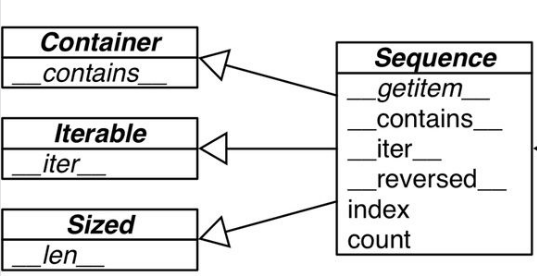

즉, 추상 클래스인 Sequence를 상속하지 않아도 \_\_getitem\_\_() 메서드 구현을 통해 시스템에서 어떤 역할을 할 수 있게 하기 때문에 프로토콜은 상속과 무관

# 11.3 런타임에 프로토콜을 구현하는 멍키 패칭
- 규정된 프로토콜을 잘 따르면, 덕 타이핑 덕분에 기존 표준 라이브러리와 서드 파티 코드를 활용할 수 있는 가능성이 높아진다.
- 가변 시퀀스는 \_\_setitem\_\_() 메서드도 지원해야한다.
- 멍키 패칭은 소스 코드를 건드리지 않고 런타임에 클래스나 모듈을 변경하는 행위를 말한다.

In [6]:
from random import shuffle
l = list(range(10))
shuffle(l)
l

[3, 7, 4, 8, 5, 6, 9, 2, 0, 1]

In [7]:
import collections

Card  = collections.namedtuple("Card",['rank','suit'])

class FrenchDeck:
    ranks = [ str(n) for n in range(2,11) ] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank,suit) for suit in self.suits for rank in self.ranks ]
        
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

In [8]:
deck = FrenchDeck()
shuffle(deck)

TypeError: 'FrenchDeck' object does not support item assignment

In [10]:
def set_card(deck, position, card):
    deck._cards[position] = card
    
FrenchDeck.__setitem__ = set_card
shuffle(deck)
deck[:5]

[Card(rank='9', suit='hearts'),
 Card(rank='J', suit='clubs'),
 Card(rank='4', suit='diamonds'),
 Card(rank='5', suit='clubs'),
 Card(rank='K', suit='hearts')]

# 11.4 알렉스 마르텔리의 물새
- 덕 타이핑은 객체의 실제 자료형은 무시하고, 대신 객체가 용도에 맞는 메서드 이름, 시그너처, 의미를 구현하도록 보장하는데 주안점을 둔다.
- 파이썬에서는 결국 자료형 검사를 위한 isinstance() 함수 사용의 회피를 의미한다. type(foo)가 bar 형인지 검사하는 방식은 더 나쁘다. 간단한 형태의 상속조차도 사용할 수 없게 만들기때문
    - isinstance() 는 상속 받은 클래스도 자료형 검사에서 통과하는데 반해 type(foo) 와 같은 방식으로 검사하는 방식은 완전히 같은 클래스일 때만 작동하게 하므로 코드의 유연성을 더 떨어트리기 때문

## 덕타이핑(표현학)과 구스타이핑(분기학)

- 수금류 등을 포함해서 속과 종의 분류법은 표현학이 주도. 표현학은 형태학과 동작의 유사성, 즉 관측할 수 있는 특징에 주안점을 둔 방식으로 ‘덕 타이핑’과 상당히 유사
- 실제로는 관련이 없으나 우연이 비슷하게 진화한 종들이 형태학적으로나 행위적으로 비슷한 특징을 갖기도 함. ⇒ 이와 같은 유사성이 프로그래밍에서도 발생. 아래가 그 예시
```python
class Artist:
		def draw(self): ... # 그림 그리기
class Gunslinger:
		def draw(self): ... # 총을 뽑는 행위
class Lottery:
		def draw(self): ... # 복권 추첨
```

- 위의 예시 처럼 아무런 인수 없이 호출할 수 있는 draw() 메서드가 존재한다고 해서 x.draw() 와 y.draw()로 호출할 때 x,y 두 객체가 관념적으로 대등하다고 보장할 수 없음 
- 즉, 동일한 이름(형태학적으로 동일)의 메서드를 호출한다고 해서 의미가 비슷하다고 생각할 수 없음. 
- 위와 같은 문제점을 해결하기 위해 표현학을 대체하는 분기학 등장
- 분기학은 독자적으로 진화한 특징 대신, 공통된 조상에서 상속된 특징을 분류학적으로 선택하는 방법에 주안점을 두고 있음.
    - 표현학 기준으로 제대로 파악하지 못했던 한계를 분기학으로 극복
    - 표현학 기준으로 황거위와 황오리는 다른 과로 분류되었지만 분기학 기준으로는 같은 과로 분류함

- 고전적인 덕 타이핑(표현학)을 구스타이핑(분기학)으로 보완
    - 완전히 대체하는 것이 아니라 상황에 따라 여전히 덕 타이핑이 적용
    - ***구스 타이핑***은 cls가 추상 베이스 클래스인 경우, 즉 cls 의 메타클래스가 abc.ABCMeta 인 경우에는 isinstance( obj, cls ) 를 써도 좋다는 것을 의미
    - “단말 노드가 아닌 클래스는 모두 추상 클래스로 만들어야 한다.” 조언이 있을 정도로 ABC 는 개념적 장점을 지님
    - register() 클래스 메서드는 어떤 클래스가 ABC의 ‘가상’ 서브 클래스임을 ‘선언’할 수 있게 해주며, 파이썬 ABC에 아주 큰 도움이 됨.
        - 이렇게 선언시 등록할 클래스가 ABC 의 메서드 이름 및 시그너처 요구 사항을 만족해야하며, 특히 메서드의 의미를 지켜야한다. 그러나 ABC 를 염두에 두고 등록할 클래스를 개발할 필요는 없다.
        - 이런 방식은 엄격함과 강력한 결합을 상당히 파괴하므로 대부분의 OOP 프로그래머가 일반적으로 사용하는 상속보다 훨씬 더 많은 주의를 요구
<br><br>
- **가상 서브 클래스 ( virtual subclass )**  : register method 를 통해 third party 의 클래스를 자신이 만든 클래스의 서브 클래스처럼 만듦( =  issubclass( third party class, my class ), isinstance 를 참으로 반환 )  이때의 서브 클래스가 가상 서브 클래스. 그러나 가상 서브 클래스는 자신을 등록한 class로부터 아무런 메서드를 상속받지 않음.
<br><br>
- **구상 클래스 ( concrete class )** : object 를 만들기 위해 만드는 클래스 ⇒ 모든 메서드가 구현되어있어야함. 추상 클래스와 대비되는 용어이며 구상 클래스 / 구현 클래스 / 구체화된 클래스로 용어가 혼동되어 사용됨. 구상 클래스를 만들기 위해 물려받게 되는 것들이 구상 클래스 / 추상 클래스 / 인터페이스 이다.

- 클래스를 ABC 의 서브 클래스로 인식시키기 위해 등록할 필요가 없는 다음과 같은 경우도 존재
- abc.Sized 클래스는 Struggle 을 서브 클래스로 인식한다.
    - \_\_len\_\_() 특별 메서드만 구현하면 되고 register 로 등록할 필요도 없음. 그러나 \_\_len\_\_() 메서드는 구문과 의미를 적절히 지켜줘야함

In [16]:
class Struggle:
    def __len__(self): return 23
from collections import abc
isinstance(Struggle(), abc.Sized)

True

#### 알렉스 마르텔리 에세이 정리
- numbers, collections.abc, ABC 가 표현하는 개념을 실현하는 클래스를 구현할 때는 언제나 해당 ABC를 상속하거나 해당 ABC 에 등록할 것.
- 코드 시작 부분에서 클래스를 직접 등록
- <b>ABC 를 직접 생성하지 말 것 </br>

- ABC 를 사용하더라도 isinstance() 를 너무 많이 사용하는 것은 코드 악취 일 수 있음
    - 일반적으로 객체형에 따라 다른 행위를 할 수 있도록 if/elif/else 블록 안에서 계속 isinstance()를 검사하는 방식의 디스 패치 논리를 직접 구현하는 것은 좋지 않음
    - 인터프리터가 적절한 메서드를 호출할 수 있게 구현해야함
        - ❓무슨 뜻이지.. 앞의 _ _ getitem _ _ () 을 통해 in 연산자를 이용하거나 Foo 객체를 반복하게 하는 것을 말하는 건가?

- 한편 API 요구 사항을 강제로 적용해야 한다면 ABC에 대해 isinstance() 검사를 하는 것도 일반적으로 나쁘지 않음. 이 방법은 플러그인 아키텍쳐를 가지고 있는 시스템에서 유용.
- 그러나 프레임 워크를 제외하고 일반적으로 덕타이핑이 자료형 검사보다 간단하고 융통성이 높다.
    - e.g. 1) 예제 11-13 처럼 클래스 항목을 시퀀스로 받을 때 list 로 처리하는 것
```python
# 예제 11-13
import random 
from tombola import Tombola
class LotteryBlower(self, iterable):
    def __init__(self, iterable):
        self._balls = list(iterable)
    def load(self, iterable):
        self._balls.extend(iterable)
    def pick(self):
        try:
            position = random.randrange(len(self.balls))
        except ValueError:
            raise LookUpError('pick from empty BingoCage')
        return self._balls.pop(position)
    def loaded(self):
        return bool(self._balls)
    def inspect(self):
        return tuple(sorted(self._balls))
```
    - e.g. 2) namedtuple2
```python
# 예제 11-7
try:
		filed_names = filed_names.replace(',',' ').split()
except AttributeError:
		pass
# 이때 isinstance() 함수를 사용하고 싶겠지만 덕타이핑을 사용하는 것이 좋다.
filed_names = tuple(filed_names) 
```
- 그러나 시퀀스 인수가 너무 크거나 시퀀스 인수를 변경할 때는 예제 11-7,11-13 처럼 못함. 이 상황에서는 isinstance(x, abc.MutableSequence ) 로 인수를 검사하는 것이 좋다. 시퀀스가 너무 크면 list() , tuple()로 복사해서 객체를 생성하기엔 비효율적이기 때문

# 11.5 ABC 상속하기
- 파이썬은 모듈을 로딩하거나 컴파일할 때가 아니라, 실행 도중 실제로 FrenchDeck2 객체를 생성할 때 추상 메서드의 구현 여부를 확인한다. 
    - 이때 추상 메서드 중 하나라도 구현되어 있지 않으면 TypeError 예외가 발생
    - 이 이유로 FrenchDeck2 예제에서 사용하지도 않는 _ _ delitem _ _ () 과 insert() 메서드를 구현
- collections.ABC 의 구상 메서드는 클래스의 공개 인터페이스만 이용해서 구현하므로, 클래스 내부 구조를 몰라도 제대로 작동한다. 
    - 예제 11-9 처럼 구현되지 않은 추상 메서드 load 와 pick 를 ABC 내의 구상 메서드인 loaded, inspect 에 사용하는 것이 해당 문장의 예시인듯

In [18]:
import collections

Card = collections.namedtuple('Card', ['rank','suit'])

class FrenchDeck2(collections.abc.MutableSequence):
    ranks = [str(n) for n in range(2,11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                      for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]
    
    def __setitem__(self, position, value):
        self._cards[position] = value

    def __delitem__(self, position):
        del self._cards[position]

    def insert(self, position, value):
        self._cards.insert(position, value)

# 11.6 표준 라이브러리의 ABC
- 클래스를 상속하지 않고 사용할 수 있는 메서드를 '믹스인 메서드'라고 한다.

## 11.6.1 collections.abc의 ABC
- 대부분의 ABC는 collections.abc 모듈에 정의되어 있다. 어떤 ABC들이 있는지 살펴보자.

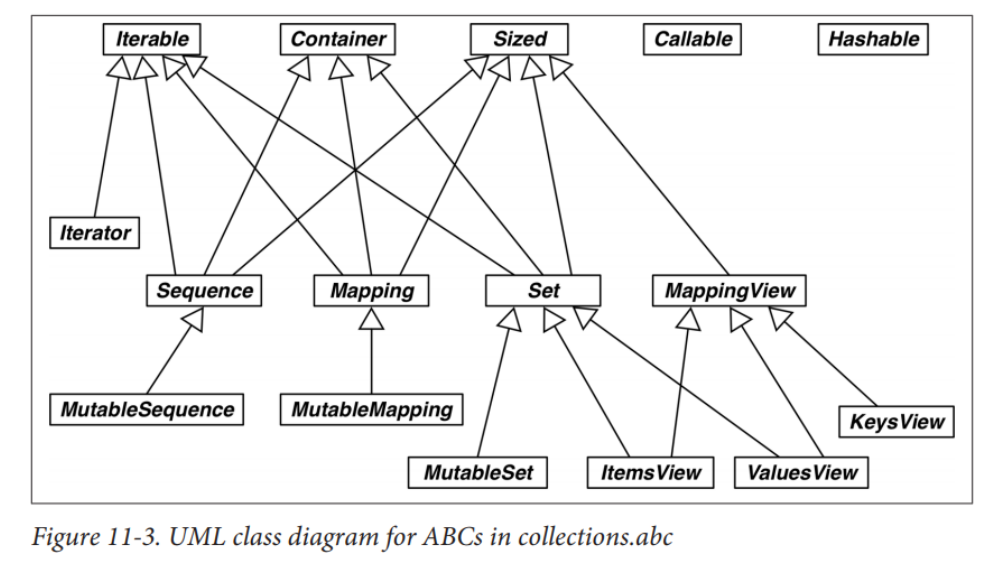

## 11.6.2 ABC 의 숫자탑
numbers 패키지는 소위 숫자탑이라고 하는 것을 정의한다.(말 그대로 ABC들이 선형 계층 구조로 되어있다. ) 다음과 같이 Number가 최상위 슈퍼클래스이며, 그 밑에 Complex, 그리고 계속해서 Integral 까지 내려간다.
- Number
- Complex
- Real
- Rational
- Integral

# 11.7 ABC 정의와 사용
- ABC 구현 장려하는 것이 아니라, ABC 소스코드를 읽는 방법을 배우기 위해 이 장이 존재

In [27]:
import abc

class Tombola(abc.ABC): # ABC 정의하기 위해 상속
    
    @abc.abstractmethod
    def load(self, iterable):
        """iterable의 항목들을 추가한다."""
        
    @abc.abstractmethod
    def pick(self):
        """무작위로 항목을 하나 제거하고 반환한다.
        객체가 비어 있을 때 이 메서드를 실행하면 'LookupError'가 발생한다.
        """
        
    def loaded(self): # ABC 에도 구상 메서드가 들어갈 수 있다
        """최소 한 개의 항목이 있으면 True, 아님 False 반환"""
        # ABC의 구상 메서드는 반드시 ABC에 정의된 인터페이스, 즉
        # ABC의 다른 구상 메서드나 추상 메서드, 혹은 프로퍼티만 사용해야 한다.
        return bool(self.inspect())
    
    def inspect(self):
        """현재 안에 있는 항목들로 구성된 정렬된 튜플 반환"""
        items = []
        while True:
            try:
                # pick() 을 계속 호출해서 Tombola 객체를 비움
                items.append(self.pick())
            except LookupError:
                break
        self.load(items) # load 메서드를 호출해서 다시 넣는다
        return tuple(sorted(items))

- ABC를 정의하려면 abc.ABC를 상속해야한다.
- 추상메서드를 @abstractmethod 데커레이터로 표시한다. 이 데커레이터에는 문서화 문자열만 들어있는 경우가 종종있다. 
- ABC의 구상 메서드는 반드시 ABC에 정의된 인터페이스(즉, ABC의 다른 구상 메서드나 추상 메서드, 혹은 프로퍼티)만 사용해야한다.
- 이 코드의 핵심은 ABC 안에서 인터페이스에 정의된 다른 메서드만 이용하는 한 ABC에 구상 메서드를 제공하는 것도 가능하다는 점을 보여주는 것이다.

## 11.7.1 ABC 상세 구문
- ABC를 선언할 때는 abc.ABC 나 다른 ABC를 상속하는 방법이 가장 좋다.
- 일반적인 클래스는 서브 클래스를 검사하지 않으나, ABC 클래스는 서브 클래스를 검색한다.
- abstractmethod()를 다른 메서드 디스크립터와 함께 적용할 때는 이 데커레이터를 제일 안쪽에 위치시켜야 한다.
    - 즉, @abstractmethod 와 def 문 사이에는 어떤 것도 올 수 없다.

In [29]:
class MyABC(abc.ABC):
    @classmethod
    @abc.abstractmethod
    def an_abstract_classmethod(cls):
        pass

## 11.7.2 Tombola ABC 상속하기

In [32]:
import random
class BingoCage(Tombola):
    def __init__(self, items):
        self._randomizer = random.SystemRandom()
        self._items = []
        self.load(items)
        
    def load(self, items):
        self._items.extend(items)
        self._randomizer.shuffle(self._items)
        
    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')
            
    def __call__(self):
        self.pick()

In [33]:
import random
class LotteryBlower(Tombola):
    def __init__(self, iterable):
        self._balls = list(iterable) # 사본으로 저장
        
    def load(self, iterable):
        self._balls.extend(iterable)
        
    def pick(self):
        try:
            pos = random.randrange(len(self._balls))
        except ValueError:
            raise LookupError('pick from empty BingCage')
        return self._balls.pop(pos)
    
    def loaded(self):
        return bool(self._balls)
    
    def inspect(self):
        return tuple(sorted(self._balls))

## 11.7.3 Tombola 의 가상 서브 클래스
- 구스 타이핑의 본질적인 기능( 그리고 물새 이름을 가질 수 있는 이유)은 어떤 클래스가 ABC 를 상속하지 않더라도 해당 클래스를 그 ABC 클래스의 가상 서브 클래스로 등록할 수 있다는 것이다. 이렇게 함으로써 이 클래스가 ABC에 정의된 인터페이스를 충실히 구현한다고 약속하는 것이다. 충실히 구현하지 않으면 런타임 예외가 발생한다.
- <b>ABC의 register() 메서들르 호출하면 클래스가 등록된다. 등록된 클래스는 ABC의 가상 서브 클래스가 되어 issubclass() 와 isinstance()함수에 의해 인식되지만, ABC에서 상속한 메서드나 속성은 전혀없다. </b>
- 가상 서브 클래스는 자신의 ABC에서 상속한 것이 아니며, 심지어 객체를 생성할 때도 ABC 인터페이스를 따르는지 검사받지 않는다. 런타임 오류를 피하기 위해 필요한 메서드를 실제로 모두 구현하는 것은 전적으로 서브 클래스에 달려있다.

In [34]:
from random import randrange

@Tombola.register
class TomboList(list):
    
    def pick(self):
        if self:
            position = randrange(len(self))
            return self.pop(position)
        else:
            raise LookUpError('pop from empty TomboList')
            
    load = list.extend
    
    def loaded(self):
        return bool(self)
    
    def inspect(self):
        return tuple(sorted(self))

In [35]:
issubclass(TomboList, Tombola)

True

In [37]:
t = TomboList(range(100))
isinstance(t, Tombola)

True

In [40]:
print(TomboList.__mro__)

(<class '__main__.TomboList'>, <class 'list'>, <class 'object'>)


# 11.8 Tombola 서브 클래스 테스브 방법
pass

# 11.9 register() 의 실제 용법
- register() 를 데커레이터로 사용할 수 있음에도 불구하고, 다른 곳에서 정의된 클래스를 등록하기 위해 함수 형태로 사용하는 경우가 더 많다.
    - e.g. 1 ) Sequence.register(tuple)
    - e.g. 2 ) Sequence.register(str)
    - e.g. 3 ) Sequence.register(range)
    - e.g. 4 ) Sequence.register(memoryview)

# 11.10 오리처럼 행동할 수 있는 거위
- issubclass() 와 isinstance() 함수는 Struggle 을 abc.Sized 의 서브 클래스라고 간주한다. ( Struggle 클래스를 따로 등록하지도 않았는데도 ) 이는 abc.Sized 가 \_\_subclasshook\_\_() 이라는 특별 클래스 메서드를 구현하기 때문이다.
- \_\_subclasshook\_\_()은 구스 타이핑에 약간의 덕 타이핑 유전자를 추가한다. 
    - ABC 를 이용해서 공식적으로 인터페이스를 정의할 수 있다
    - 어디에서든 isinstance() 검사를 할 수 있다.
    - 단지 어떤 메서드를 구현하기만 하면 (혹은 \_\_subclasshook\_\_() 이 보증하게 만드는 어떤 일이든 수행하면) 전혀 상관없는 클래스들이 함께 어울리게 만들 수 있다. 물론 이것은 \_\_subclasshook\_\_() 을 제공하는 ABC에만 적용된다.

In [41]:
class Struggle:
    def __len__(self): return 23

In [42]:
from collections import abc
print(isinstance(Struggle(), abc.Sized))
print(issubclass(Struggle, abc.Sized))

True
True


```python
# Lib/_collections_abc.py 소스 코드에서 Sized() 의 정의
class Sized(metaclass=ABCMeta):
    __slots__  = ()
    
    @abstractmethod
    def __len__(self):
        return 0 
    
    @classmethod
    def __subclasshook__(cls,C):
        if cls is Sized:
            if any( "__len__" in B.__dict__  for B in C.__mro__):
                return True
        return NotImplemented
```